In [1]:
from keras.preprocessing.image import ImageDataGenerator
import cv2
import matplotlib.pyplot as plt
from os import listdir
import numpy as np
import splitfolders
from tqdm.notebook import tqdm

In [2]:
# Initializing Image Data Generator
data_gen = ImageDataGenerator(rotation_range=15, 
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              brightness_range=(0.7, 1.0))

# Loop to iterate through class names
for class_name in listdir('original_data'):
    print(f'Starting augmentation of images corresponding to the {class_name} class')
    
    # Loop to iterate through images
    for file_name in tqdm(listdir(f'original_data/{class_name}')):

        # Read the image
        image = cv2.imread(f'original_data/{class_name}/{file_name}')

        # Number of augmentations to be performed
        n = 6 if class_name == 'yes' else 9

        # Loop to generate n augmentations
        for i in range(n):

            # Augment the image and save it
            data_gen.flow(x = np.array([image]),
                          batch_size=1,
                          save_to_dir = f'augmented_data/{class_name}/',
                          save_prefix = f'aug_{class_name}',
                          save_format = 'jpg')[0]

# Split the data into training testing and validation with ratio 0.8, 0.1 and 0.1 respectvely
splitfolders.ratio('augmented_data', 'augmented_data_split', seed=1337, ratio=(0.8, 0.1, 0.1))

Starting augmentation of images corresponding to the no class


  0%|          | 0/98 [00:00<?, ?it/s]

Starting augmentation of images corresponding to the yes class


  0%|          | 0/155 [00:00<?, ?it/s]

Copying files: 1731 files [00:09, 178.91 files/s]


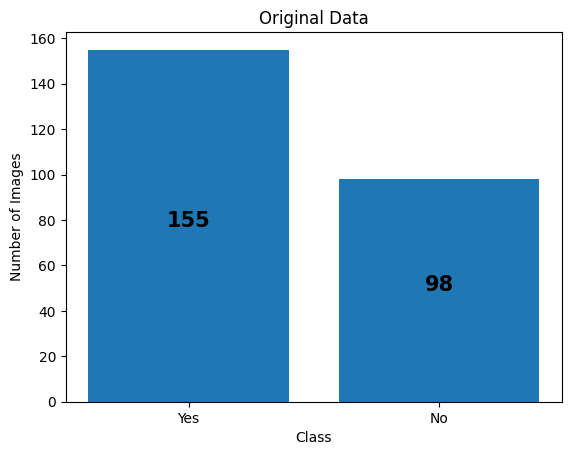

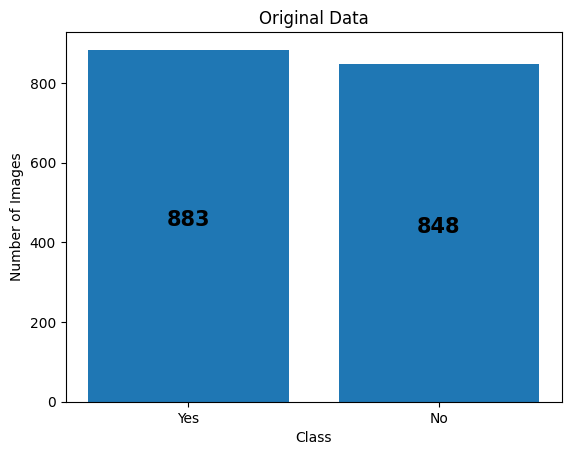

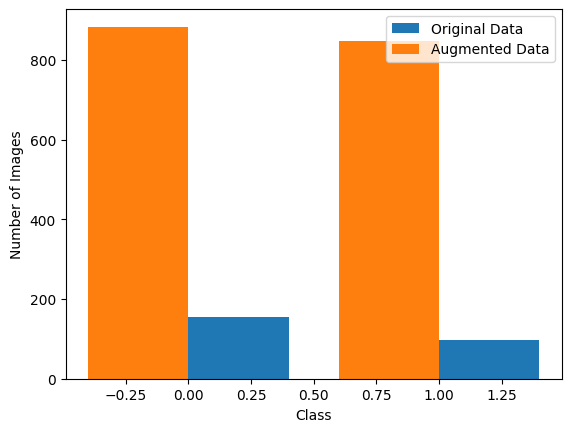

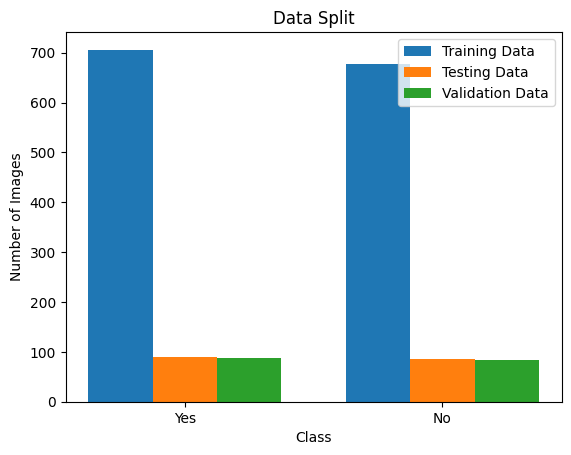

In [3]:
# Function to display value in the bar
def displayValue(x, y):
	for i in range(len(x)):
		plt.text(i, y[i] // 2, y[i], ha='center', fontsize=15, weight='bold')

# Class on X axis
x = ["Yes", "No"]

# Display original data image count
y_original = [len(listdir('original_data/yes')), len(listdir('original_data/no'))]
plt.bar(x, y_original)
displayValue(x, y_original)
plt.title("Original Data")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

# Display augmented data image count
y_augmented = [len(listdir('augmented_data/yes')), len(listdir('augmented_data/no'))]
plt.bar(x, y_augmented)
displayValue(x, y_augmented)
plt.title("Original Data")
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.show()

# Comparison between original and augmented data
x_axis = np.arange(len(x))
plt.bar(x_axis + 0.2, y_original, width=0.4, label='Original Data')
plt.bar(x_axis - 0.2, y_augmented, width=0.4, label='Augmented Data')
plt.xlabel("Class")
plt.ylabel("Number of Images")
plt.legend()
plt.show()

# Display image count after train test val split
ind = np.arange(2)
train_val = [len(listdir('augmented_data_split/train/yes')), len(listdir('augmented_data_split/train/no'))]
test_val = [len(listdir('augmented_data_split/test/yes')), len(listdir('augmented_data_split/test/no'))]
validation_val = [len(listdir('augmented_data_split/val/yes')), len(listdir('augmented_data_split/val/no'))]
bar1 = plt.bar(ind, train_val, width=0.25, label='Training Data')
bar2 = plt.bar(ind+0.25, test_val, width=0.25, label='Testing Data')
bar3 = plt.bar(ind+0.25*2, validation_val, width=0.25, label='Validation Data')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title("Data Split")
plt.xticks(ind+0.25, x)
plt.legend()
plt.show()